<h1 align=\"center\"><font color='green'><font size=\"10\">Model Evaluation</font> </h1>

<div style="background-color: #90EE90;">.</div>  </div>

 <div class = "alert alert-block alert-success">
     <font size = "5">
 Evaluation Metrics for Regression

 - Regression is a supervised learning task where the goal is to predict continuous numerical values based on input data. In regression, the model learns the relationship between independent variables and a dependent continuous variable.
  - Regression: Predicts continuous values (numerical outcomes).

 - Example: Predicting house prices based on features like size, location, and number of bedrooms, or forecasting future sales based on historical data.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Loading the Iris dataset
iris = load_iris()
# Assigning columns to Features(X) and target(y) 
X = iris.data[:, :1]  # Using only the first feature (sepal length) for regression
y = iris.data[:, 1]    # Using the second feature (sepal width) as the target

In [3]:
#Performing an 70/30 split to create training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
#Training the model 
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
#Predicting on the test model
y_pred = model.predict(X_test)

## Mean Absolute Error (MAE)
 -  Average absolute errors between predicted and actual values.
 
 Good for understanding average prediction error in units of the target variable. Useful in real estate price predictions where interpretability is important.
##### Formula:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

Example: If the actual values are [2, 3, 5] and predictions are [2.5, 2, 6], then:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| = \frac{|2-2.5| + |3-2| + |5-6|}{3} = \frac{0.5 + 1 + 1}{3} = \frac{2.5}{3} \approx 0.83
$$


In [6]:
#Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.36


## Mean Squared Error (MSE)
 -  Average of squared differences between predicted and actual values.
 
 Highlights larger errors more than MAE due to squaring the differences. Useful in scenarios where larger errors are particularly undesirable, like predicting stock prices.
##### Formula:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
 Example: Using the same actual and predicted values as before:
 $$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{(2-2.5)^2 + (3-2)^2 + (5-6)^2}{3} = \frac{0.25 + 1 + 1}{3} = \frac{2.25}{3} \approx 0.75
$$


In [7]:
#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.23


## Root Mean Squared Error (RMSE)
 - Average magnitude of the prediction errors, expressed in the same units as the target variable. RMSE gives higher weight to larger errors, making it sensitive to outliers.
 
Useful for understanding overall prediction accuracy, particularly in applications where large errors are particularly undesirable, such as in financial forecasting or engineering.

##### Formula:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Example:
If the actual values are 
[
2
,
3
,
5
]
[2,3,5] and predictions are 
[
2.5
,
2
,
6
]
[2.5,2,6], then:
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{\frac{1}{3} \left( (2 - 2.5)^2 + (3 - 2)^2 + (5 - 6)^2 \right)} 
$$

$$
\text{RMSE} = \sqrt{\frac{1}{3} (0.25 + 1 + 1)} = \sqrt{\frac{2.25}{3}} \approx 0.87
$$


In [8]:
#Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.48


## R-squared
 -  Proportion of variance explained by the model.
 
Indicates the proportion of variance explained by the model. Useful in assessing how well a linear regression model fits the data in contexts like sales forecasting.
##### Formula:
$$
R^2 = 1 - \frac{\text{SS}_{res}}{\text{SS}_{tot}}
$$
Example: If the total sum of squares (SS_tot) is 10 and the residual sum of squares (SS_res) is 3, then:
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{3}{10} = 0.70
$$
This means 70% of the variance is explained by the model.

In [9]:
#Calculating R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

R-squared (R²): -0.11


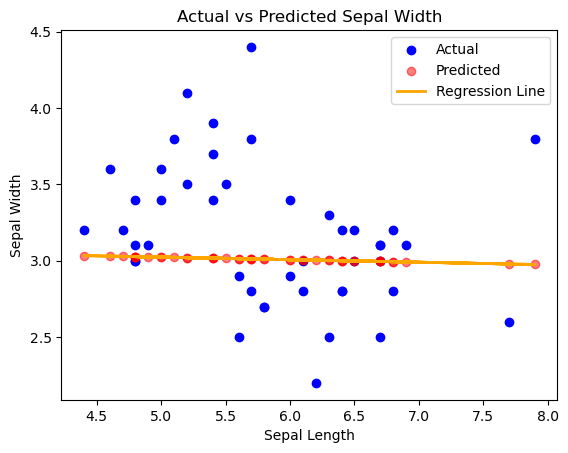

In [10]:
#plotting
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Regression Line')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Actual vs Predicted Sepal Width')
plt.legend()
plt.show()

## Cross-Validation
#### K-Fold Cross-Validation
-  Splits the dataset into K subsets. Trains the model on K-1 subsets and validates on the remaining one. Repeats K times.

Use cases: General model evaluation for diverse training/validation splits.

In [21]:
from sklearn.model_selection import cross_val_score
#Calculating Mean Cross-Validation Score 
scores = cross_val_score(model, X, y, cv=5)
print("Mean Cross-Validation Score: ", scores.mean())


Mean Cross-Validation Score:  -0.9393876925942098


##### The Mean Cross-Validation Score was -0.94, indicating poor model performance. To improve it, consider tuning hyperparameters, using a different model, or feature engineering.

#### Stratified K-Fold Cross-Validation
 -  Ensures each fold has the same proportion of class labels, useful for imbalanced datasets.
 
Use cases: Maintains class proportions in imbalanced datasets, like medical diagnostics.

###### Evaluating machine learning models is essential for ensuring their effectiveness. By employing appropriate metrics and cross-validation techniques, we can confidently assess model performance and make informed decisions.